### This is the exploratory analysis of WHO data on the mortality rate per 1000 live births of Infants(between birth and 1 year) and children under 5 years of age. The data is on countries all over the world and it is from 1950 to 2019.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

from datetime import datetime

pd.set_option('display.max_rows', 15)
sns.set_style('darkgrid')

matplotlib.rcParams['font.size']=15
matplotlib.rcParams['figure.figsize']=(20,10)


In [3]:
mortalityrate_df = pd.read_csv(r'C:\Users\Admin\Documents\DATASETS\WHO\project\MortalityRatePer1000LiveBirths.csv')

In [4]:
mortalityrate_df 

,Location,Period,Sex,InfantUnderone,Underfive
0,Afghanistan,2019,Both sexes,46.51,60.27
1,Afghanistan,2019,Male,49.80,63.83
2,Afghanistan,2019,Female,43.05,56.57
3,Afghanistan,2018,Both sexes,48.04,62.54
4,Afghanistan,2018,Male,51.35,66.08
...,...,...,...,...,...
29994,Timor-Leste,2002,Both sexes,77.08,96.97
29995,Timor-Leste,2002,Male,82.53,102.60
29996,Timor-Leste,2002,Female,71.37,91.04
29997,Timor-Leste,2001,Both sexes,80.96,102.50


In [5]:
#Rename the Period column to Year

mortalityrate_df.rename(columns={'Period':'Year'}, inplace=True)

mortalityrate_df

,Location,Year,Sex,InfantUnderone,Underfive
0,Afghanistan,2019,Both sexes,46.51,60.27
1,Afghanistan,2019,Male,49.80,63.83
2,Afghanistan,2019,Female,43.05,56.57
3,Afghanistan,2018,Both sexes,48.04,62.54
4,Afghanistan,2018,Male,51.35,66.08
...,...,...,...,...,...
29994,Timor-Leste,2002,Both sexes,77.08,96.97
29995,Timor-Leste,2002,Male,82.53,102.60
29996,Timor-Leste,2002,Female,71.37,91.04
29997,Timor-Leste,2001,Both sexes,80.96,102.50


In [6]:
mortalityrate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        29999 non-null  object 
 1   Year            29999 non-null  int64  
 2   Sex             29999 non-null  object 
 3   InfantUnderone  29999 non-null  float64
 4   Underfive       29999 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.1+ MB


In [7]:
# We can see the columns we have, the data type of each column and that we don't have any null values in all our columns.

In [8]:
#To get general statistical information on our data.

mortalityrate_df.describe()

,Year,InfantUnderone,Underfive
count,29999.000000,29999.000000,29999.000000
mean,1989.123604,53.807862,80.038707
std,18.657715,48.476400,81.437673
min,1950.000000,1.360000,1.530000
25%,1975.000000,14.720000,17.455000
50%,1990.000000,37.930000,47.960000
75%,2005.000000,81.295000,119.200000
max,2019.000000,282.700000,429.700000


In [9]:
# There are 29999 rows.
# The data is generally from the year 1950 to 2019.
# The average mortality rate for infants is 53.807 and under five years of age is 80.038. Both of these are quite high.

In [10]:
# What are the column names.

mortalityrate_df.columns

Index(['Location', 'Year', 'Sex', 'InfantUnderone', 'Underfive'], dtype='object')

In [11]:
# Our data frame is a matrix

mortalityrate_df.shape

(29999, 5)

In [12]:
mortalityrate_df['Sex'].unique

<bound method Series.unique of 0        Both sexes
1              Male
2            Female
3        Both sexes
4              Male
            ...    
29994    Both sexes
29995          Male
29996        Female
29997    Both sexes
29998          Male
Name: Sex, Length: 29999, dtype: object>

In [13]:
#the data is based on only 3 distinct sexes, Male, Female, and Both sexes.

In [14]:
# Checking for any duplicates

duplicates=mortalityrate_df.duplicated().sum()

print('There are {} duplicates'. format(duplicates))

There are 0 duplicates


In [15]:
# Let's get a sample of the entire data.

mortalityrate_df.sample(15)

,Location,Year,Sex,InfantUnderone,Underfive
28979,Sweden,2016,Female,2.08,2.56
4705,Burundi,2011,Male,61.57,90.72
11569,Greece,2014,Male,4.10,4.65
25857,Saint Vincent and the Grenadines,1978,Both sexes,48.81,63.57
23208,Paraguay,2018,Both sexes,17.20,20.13
5367,Cameroon,1961,Both sexes,160.00,270.20
17633,Luxembourg,1983,Female,8.86,10.63
26475,Saudi Arabia,2001,Both sexes,17.66,20.69
24604,Republic of Moldova,2012,Male,15.76,18.29
7401,Cuba,1997,Both sexes,7.82,9.88


In [16]:
# From this we can generally see the data covers all continents including islands like Fiji. 
# It is a good representation of the mortality rates of children across the world

In [17]:
# Let's sort our data frame in descending order of InfantUnderone.

mortalityrate_df.sort_values(by='InfantUnderone', ascending=False, inplace=True)

mortalityrate_df

,Location,Year,Sex,InfantUnderone,Underfive
22696,Pakistan,1951,Male,282.70,369.40
22693,Pakistan,1952,Male,270.20,353.70
22695,Pakistan,1951,Both sexes,267.70,364.50
22690,Pakistan,1953,Male,258.50,338.80
22692,Pakistan,1952,Both sexes,255.70,348.90
...,...,...,...,...,...
26159,San Marino,2017,Female,1.47,1.65
13286,Iceland,2018,Female,1.46,1.86
13283,Iceland,2019,Female,1.42,1.81
26156,San Marino,2018,Female,1.41,1.59


In [18]:
# The highest mortality rates recorded were in Pakistan in the year 1951 who were male children.
# The lowest mortality rates recorded were in San Marino in the year 2019 who were female children.
# By looking at the data generally, we can assume the Female children have a lower mortality rate compared to the male children.

In [19]:
# How mortality rates varied over the years for all countries

year_df = mortalityrate_df.groupby('Year')[['InfantUnderone', 'Underfive']].mean()

year_df

,InfantUnderone,Underfive
Year,,
1950,97.681837,147.587279
1951,103.502982,155.428655
1952,104.671042,157.695990
1953,103.329118,156.046716
1954,101.792095,154.436381
...,...,...
2015,23.032500,30.970252
2016,22.389690,29.913663
2017,21.786492,28.992984


In [20]:
# From a general overview we can see that there was a slight increase from 1950 to 1952 then there was an overall decrease in mortality rates.
# I think this is because not all countries had their data recorded between 1950 and 1951.

In [45]:
#The average mortality rate of each country
country_df = mortalityrate_df.groupby('Location')[['InfantUnderone', 'Underfive']].mean()

country_df

,InfantUnderone,Underfive
Location,,
Afghanistan,127.318851,186.769540
Albania,29.061984,34.111905
Algeria,78.741566,119.363030
Andorra,6.218667,7.947048
Angola,106.640417,177.062500
...,...,...
Syrian Arab Republic,53.086517,73.425522
Tajikistan,71.546806,90.322778
Thailand,50.763524,69.969190


In [98]:
sample_df = df.sample(15).head(15)

sample_df = sample_df.groupby('Location')[['InfantUnderone', 'Underfive']].mean()

sample_df

,InfantUnderone,Underfive
Location,,
Belgium,2.74,3.41
Botswana,32.26,41.60
Bulgaria,5.63,6.73
Cyprus,1.84,2.30
Dominican Republic,23.45,27.98
Gabon,31.15,42.46
Honduras,14.45,16.81
Kuwait,6.77,7.91
Morocco,18.34,21.39


In [62]:
# From this we can see the data collected covers 177 countries which isn't all the countries in the world but it is about 90% of the world's countries.

In [25]:
# Let's group the data by sex to confirm or refute our above assumptions.

sex_df = mortalityrate_df.groupby('Sex')[['InfantUnderone', 'Underfive']].mean()

sex_df

,InfantUnderone,Underfive
Sex,,
Both sexes,53.882927,80.111605
Female,49.493738,75.811902
Male,58.046490,84.192192


In [26]:
# Assumptions were right, Male children have a slightly higher mortality rate than the Female children.

In [88]:
# Which countries in the year 2019 have the highest and lowest mortality rates.

df = mortalityrate_df[mortalityrate_df.Year == 2019]

df = df[df.Sex == 'Both sexes']

df

,Location,Year,Sex,InfantUnderone,Underfive
5601,Central African Republic,2019,Both sexes,81.00,110.10
27093,Sierra Leone,2019,Both sexes,80.92,109.20
21834,Nigeria,2019,Both sexes,74.16,117.20
27900,Somalia,2019,Both sexes,74.03,117.00
5781,Chad,2019,Both sexes,69.10,113.80
...,...,...,...,...,...
7521,Cyprus,2019,Both sexes,1.84,2.30
15084,Japan,2019,Both sexes,1.80,2.46
27603,Slovenia,2019,Both sexes,1.66,2.08
13281,Iceland,2019,Both sexes,1.55,1.97


In [28]:
# In 2019, Central African Republic had the highest infant mortality rate while San Marino had the lowest.

In [33]:
# Now let's look at Kenya's numbers.

kenya_df = mortalityrate_df[mortalityrate_df.Location == 'Kenya']


kenya_df

,Location,Year,Sex,InfantUnderone,Underfive
15853,Kenya,1952,Male,187.00,311.20
15852,Kenya,1952,Both sexes,178.20,300.00
15850,Kenya,1953,Male,176.40,294.50
15854,Kenya,1952,Female,169.00,288.20
15849,Kenya,1953,Both sexes,168.30,283.90
...,...,...,...,...,...
15665,Kenya,2015,Female,31.71,45.36
15662,Kenya,2016,Female,30.94,43.69
15659,Kenya,2017,Female,30.46,42.37
15656,Kenya,2018,Female,29.40,40.60


In [39]:
k_df = kenya_df[kenya_df.Sex == 'Both sexes']

k_df

,Location,Year,Sex,InfantUnderone,Underfive
15852,Kenya,1952,Both sexes,178.20,300.00
15849,Kenya,1953,Both sexes,168.30,283.90
15846,Kenya,1954,Both sexes,158.90,268.40
15843,Kenya,1955,Both sexes,150.30,254.10
15840,Kenya,1956,Both sexes,142.30,240.80
...,...,...,...,...,...
15663,Kenya,2015,Both sexes,35.32,49.59
15660,Kenya,2016,Both sexes,34.45,47.78
15657,Kenya,2017,Both sexes,33.90,46.42
15654,Kenya,2018,Both sexes,32.82,44.62


In [34]:
# Generally we can see that there has been a great decrease in mortality rates in Kenya among children between 1952 and 2019.

In [35]:
kenyasex_df = kenya_df.groupby('Sex')[['InfantUnderone', 'Underfive']].mean()

kenyasex_df

,InfantUnderone,Underfive
Sex,,
Both sexes,76.751765,123.940441
Female,71.326471,117.443824
Male,81.897647,130.117059


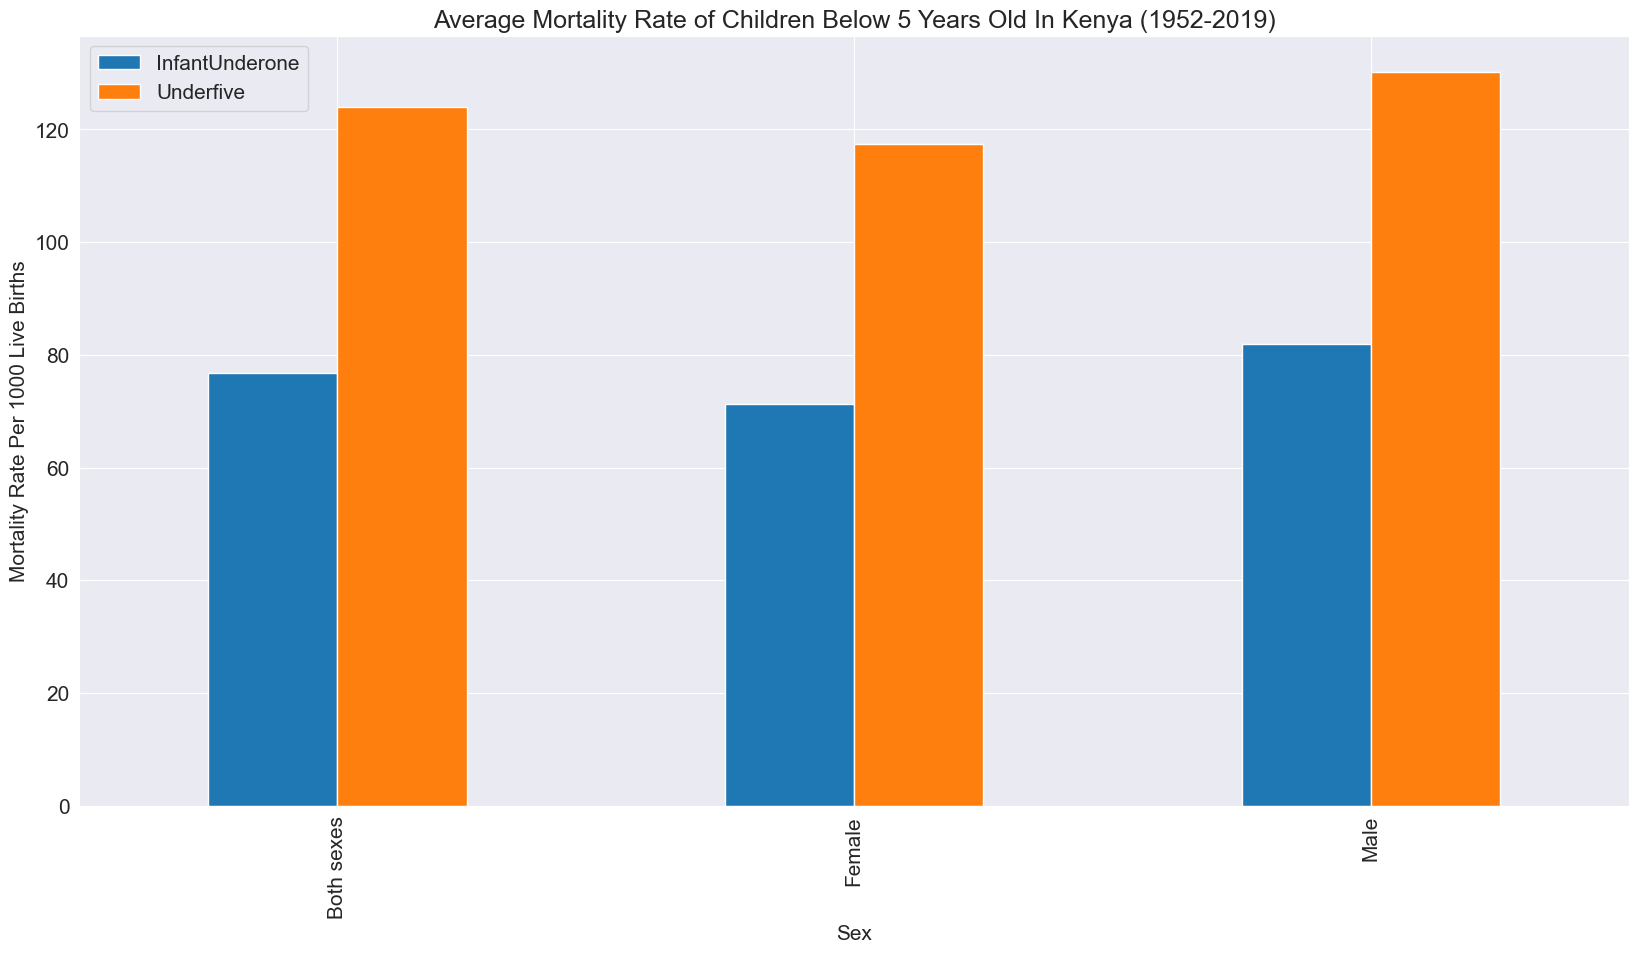

In [36]:
kenyasex_df.plot(kind='bar');
plt.ylabel('Mortality Rate Per 1000 Live Births');
plt.title('Average Mortality Rate of Children Below 5 Years Old In Kenya (1952-2019)');

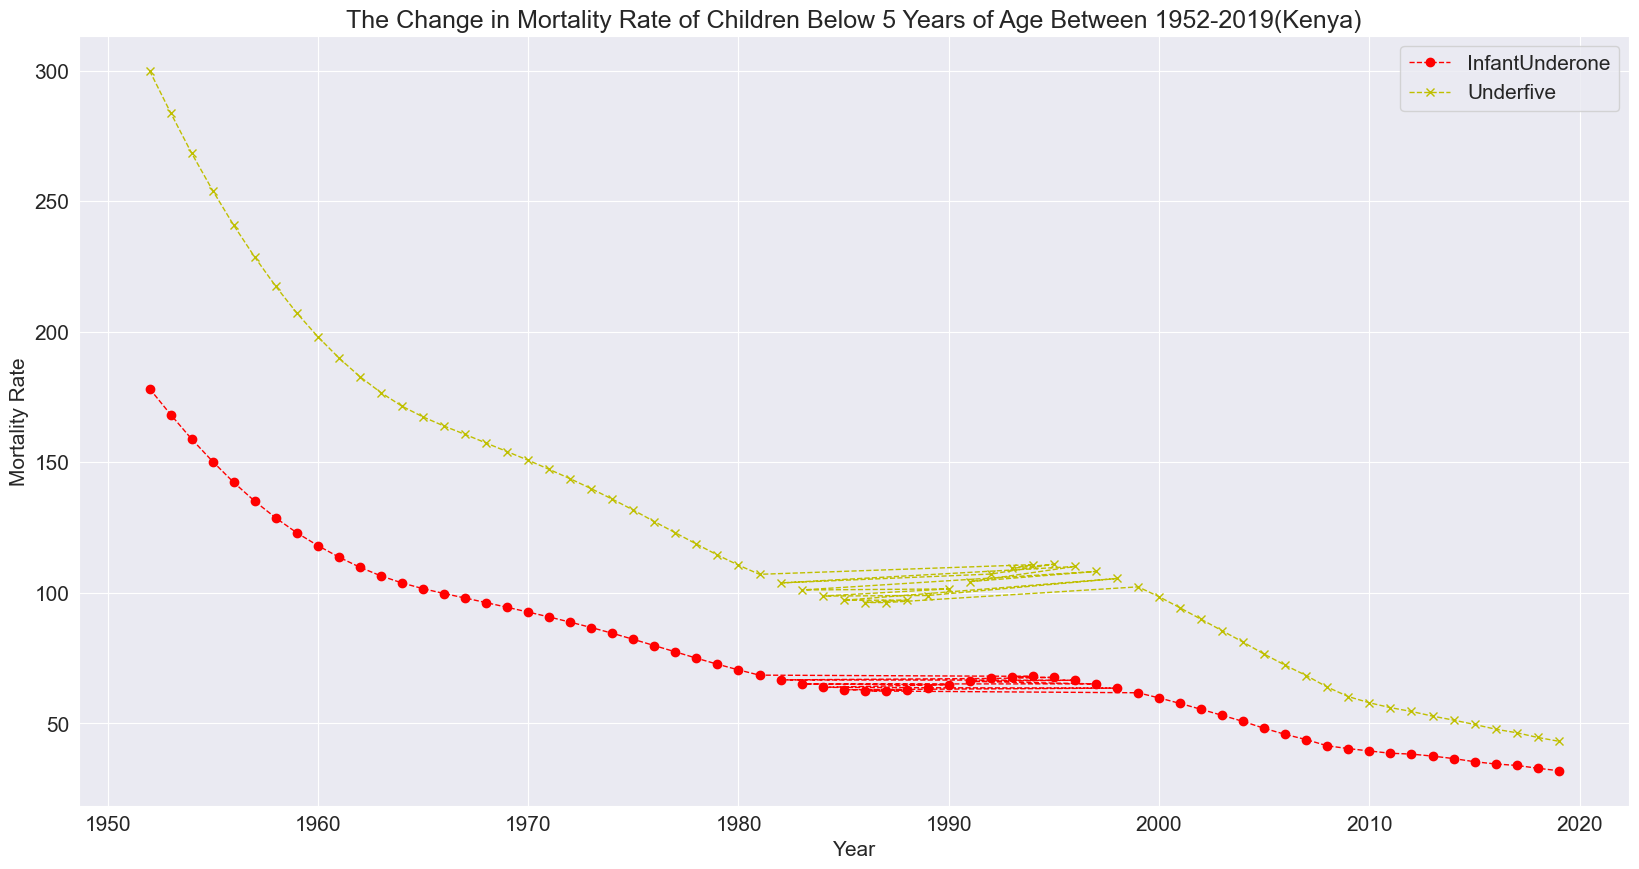

In [40]:
plt.plot(k_df['Year'], k_df['InfantUnderone'], 'o--r', ms=6, lw=1);
plt.plot(k_df['Year'], k_df['Underfive'], 'x--y', ms=6, lw=1);

plt.title('The Change in Mortality Rate of Children Below 5 Years of Age Between 1952-2019(Kenya)')
plt.legend(['InfantUnderone', 'Underfive'])

plt.xlabel('Year')
plt.ylabel('Mortality Rate');


In [41]:
# Kenya has done a good job in reducing the mortality rates since 1952.
# Between 1981 & 1999 there were inconsistent rises and drops in the mortality rates and sometimes stagnation around a certain rate.

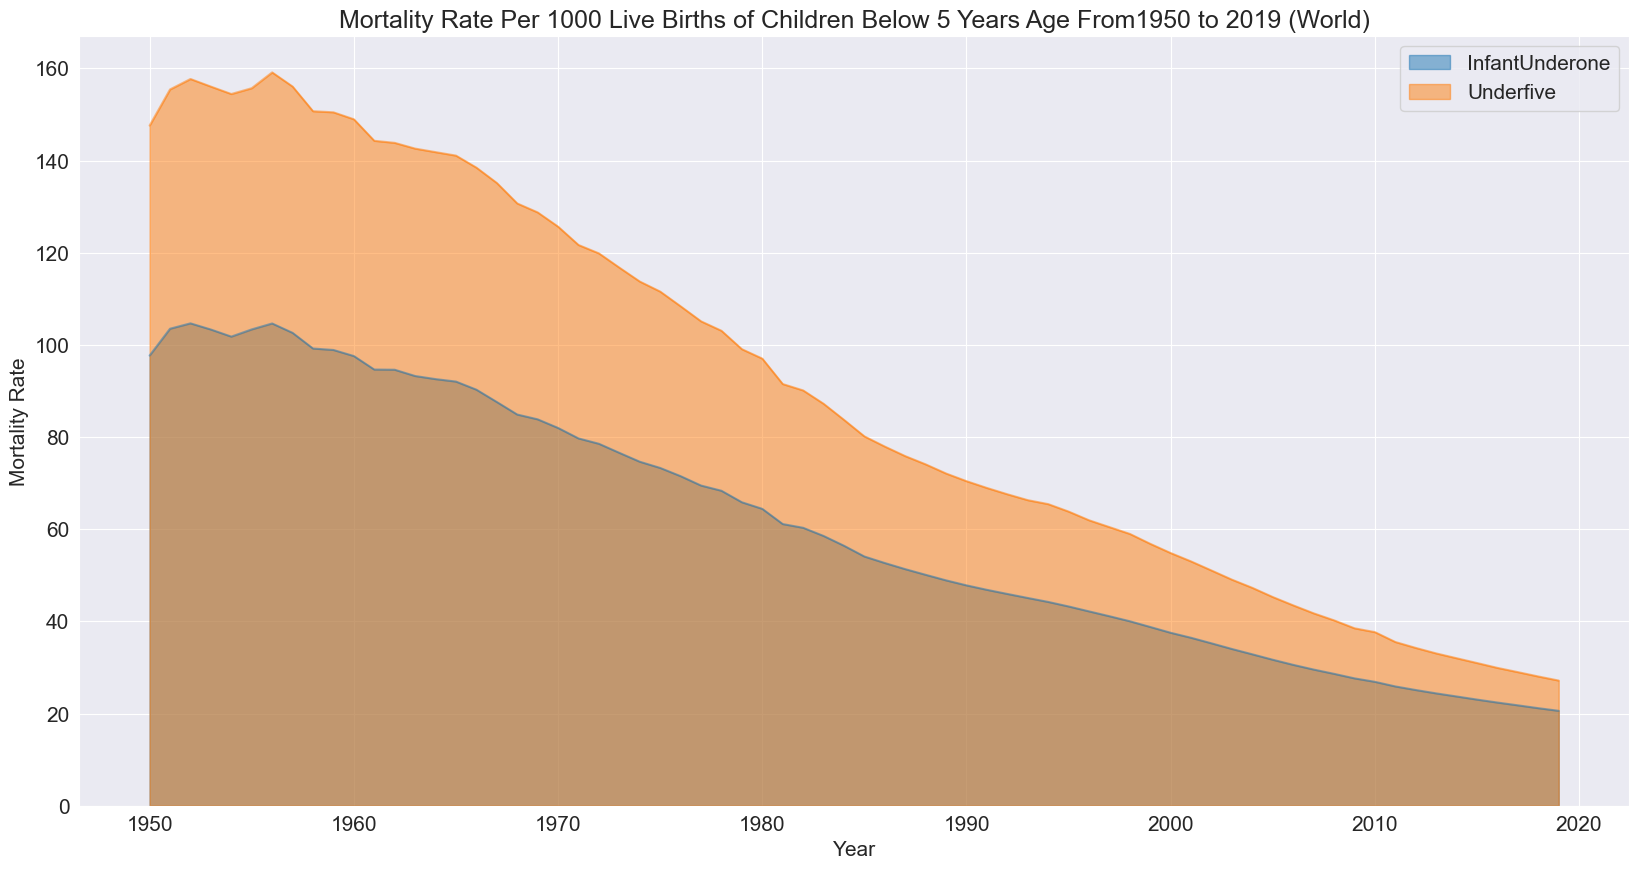

In [42]:
year_df.plot(kind='area', stacked=False, figsize=(20, 10))

plt.title('Mortality Rate Per 1000 Live Births of Children Below 5 Years Age From1950 to 2019 (World)')
plt.ylabel('Mortality Rate');

In [43]:
# There has been a major decrease in mortality rates across the world between 1950 and 2019.
# There's also been a great decrease in the mortality rate of children between ages 1 to 5 which is (Underfive - InfantUnderone).

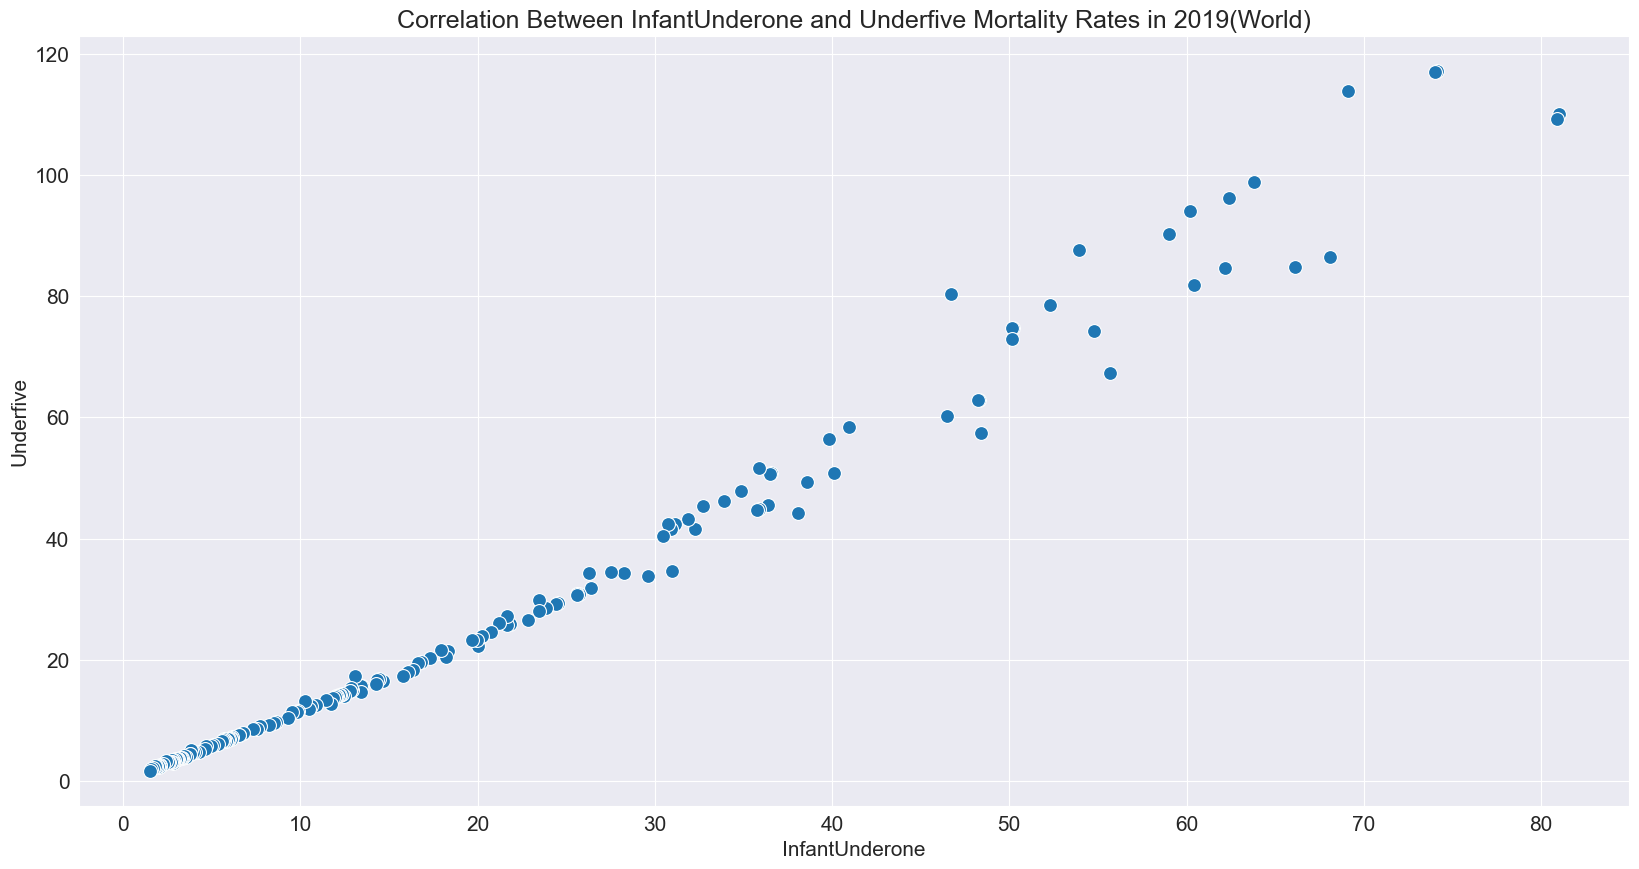

In [44]:
sns.scatterplot(x=df.InfantUnderone, y=df.Underfive, s=100);

plt.title('Correlation Between InfantUnderone and Underfive Mortality Rates in 2019(World)');

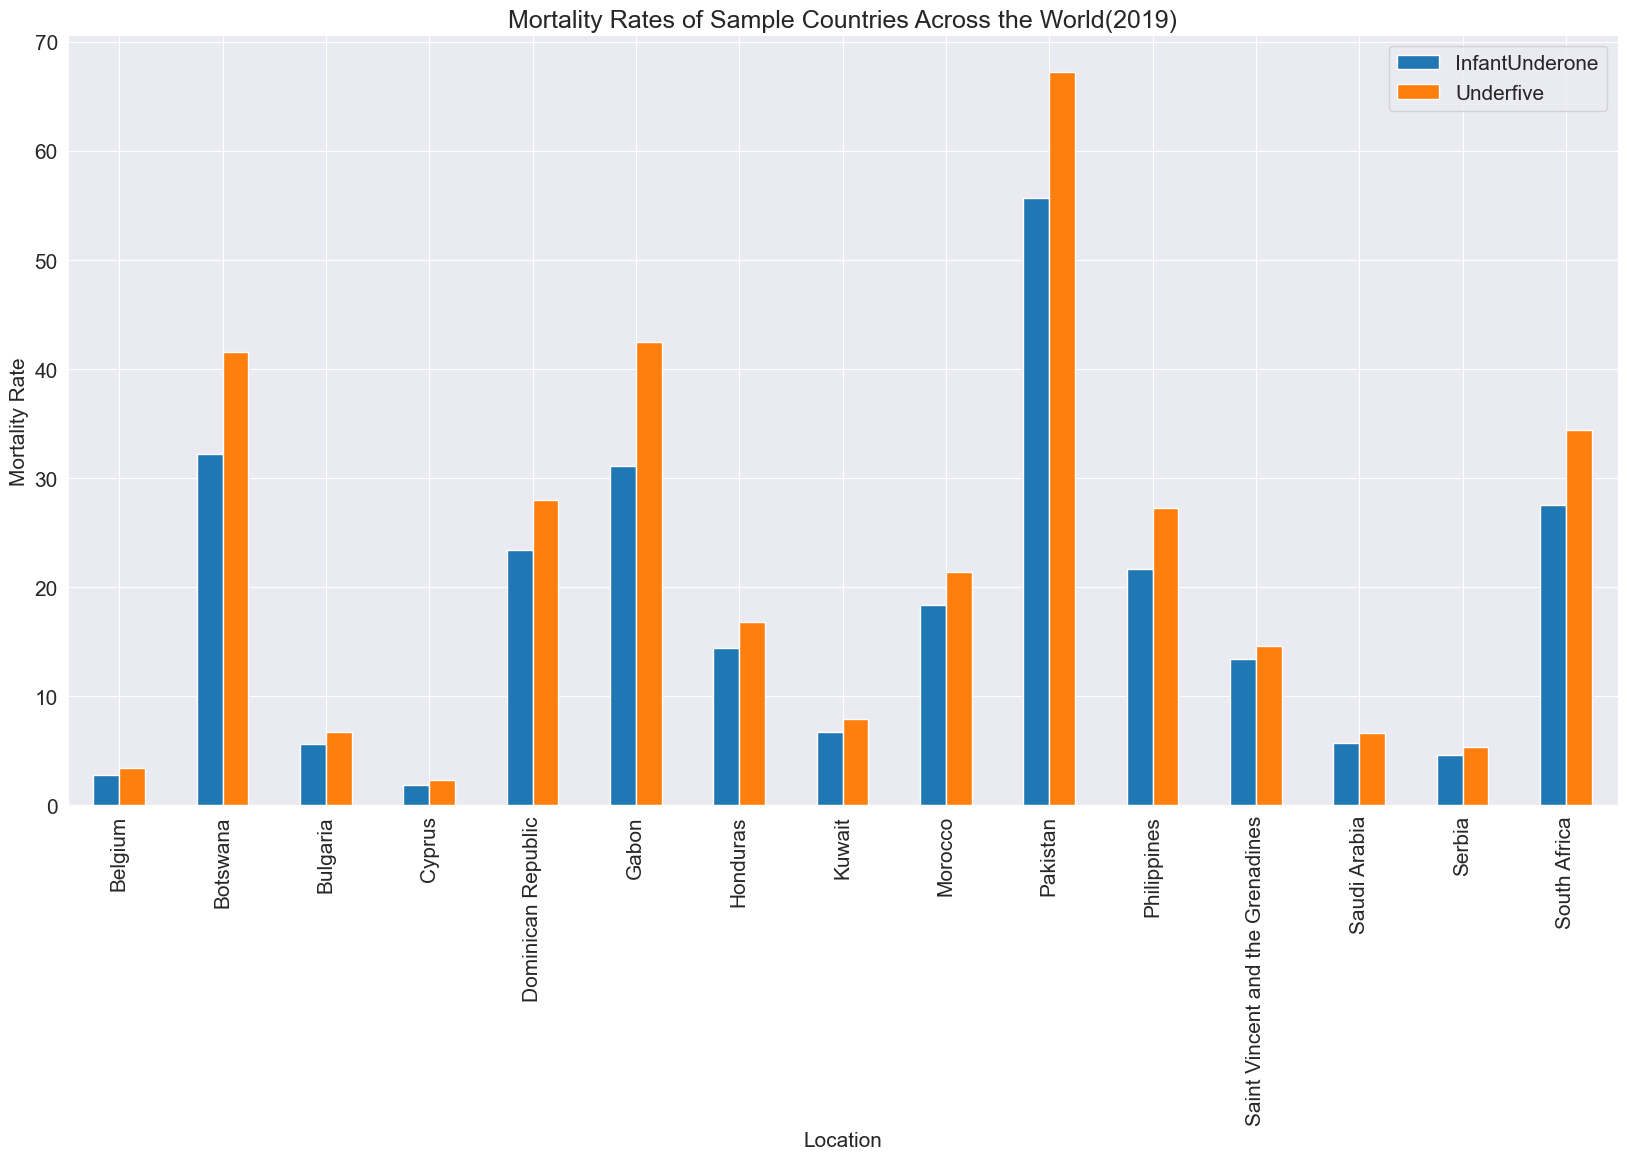

In [99]:
sample_df.plot(kind='bar')

plt.ylabel('Mortality Rate')

plt.title('Mortality Rates of Sample Countries Across the World(2019)');